In [1]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# 2. Load the dataset (no header, space-separated values in a single column)

data = pd.read_csv("house Prediction Data Set.csv", header=None, sep="\s+")

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\BKRK\AppData\Local\Temp\ipykernel_3588\849054622.py:3: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("house Prediction Data Set.csv", header=None, sep="\s+")


In [5]:
# 3. Explore the data
data.head()            # First 5 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data.columns = [
    'CRIM',     # Per capita crime rate by town
    'ZN',       # Proportion of residential land zoned for lots > 25,000 sq.ft.
    'INDUS',    # Proportion of non-retail business acres per town
    'CHAS',     # Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    'NOX',      # Nitric oxides concentration (parts per 10 million)
    'RM',       # Average number of rooms per dwelling
    'AGE',      # Proportion of owner-occupied units built prior to 1940
    'DIS',      # Weighted distances to five Boston employment centres
    'RAD',      # Index of accessibility to radial highways
    'TAX',      # Full-value property tax rate per $10,000
    'PTRATIO',  # Pupil-teacher ratio by town
    'B',        # 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    'LSTAT',    # % lower status of the population
    'MEDV'      # **Target: Median value of owner-occupied homes in $1000's
]

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
data.to_csv('HousePricePrediction_ColumNames.csv')

In [9]:
data.shape

(506, 14)

In [11]:
df = pd.read_csv("HousePricePrediction_ColumNames.csv")

In [12]:
df.shape

(506, 15)

In [14]:
# Check for missing values
print("\n--- Missing Values Check ---")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")


--- Missing Values Check ---
No missing values found


In [15]:
# Descriptive statistics
print("\n--- Descriptive Statistics ---")
print(df.describe())


--- Descriptive Statistics ---
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.45553

### Data Visualization

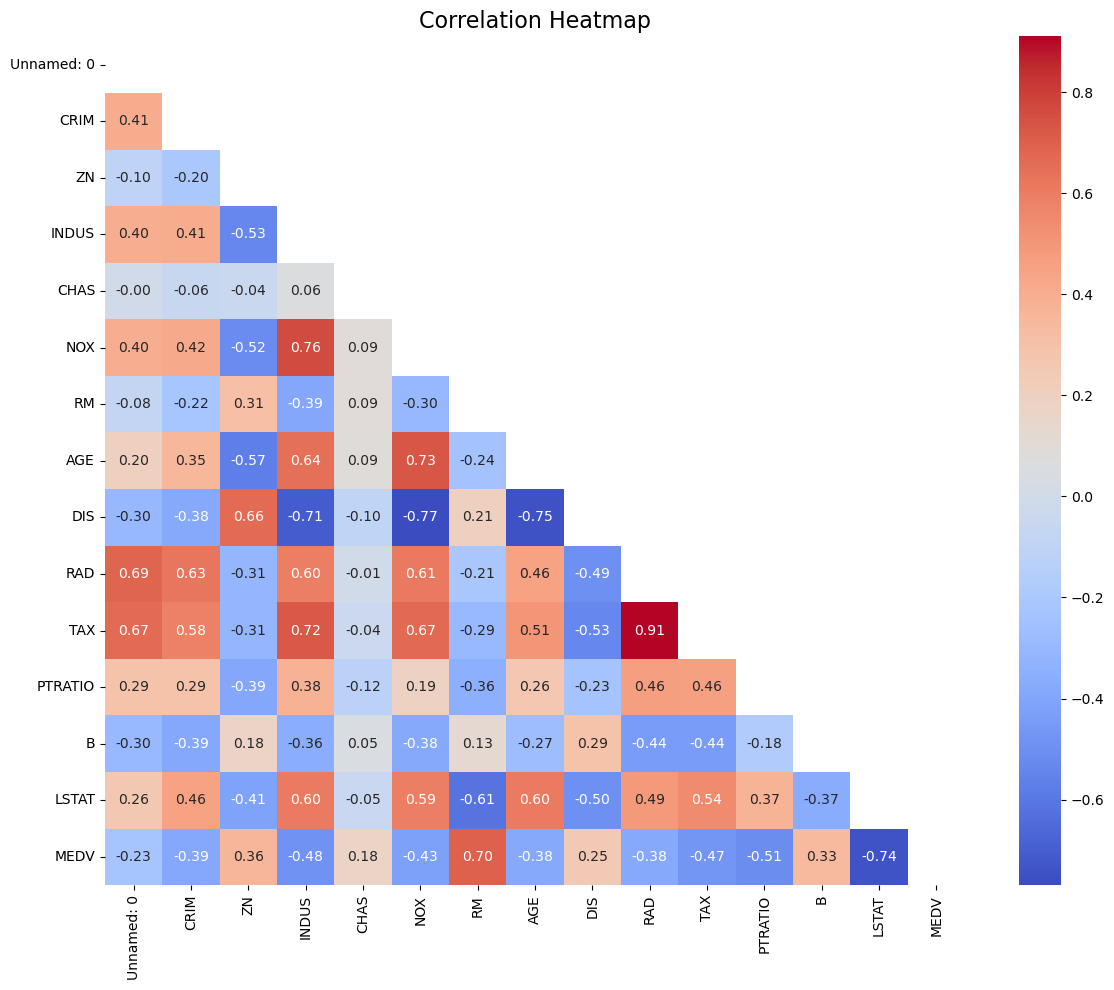

In [17]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation = df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


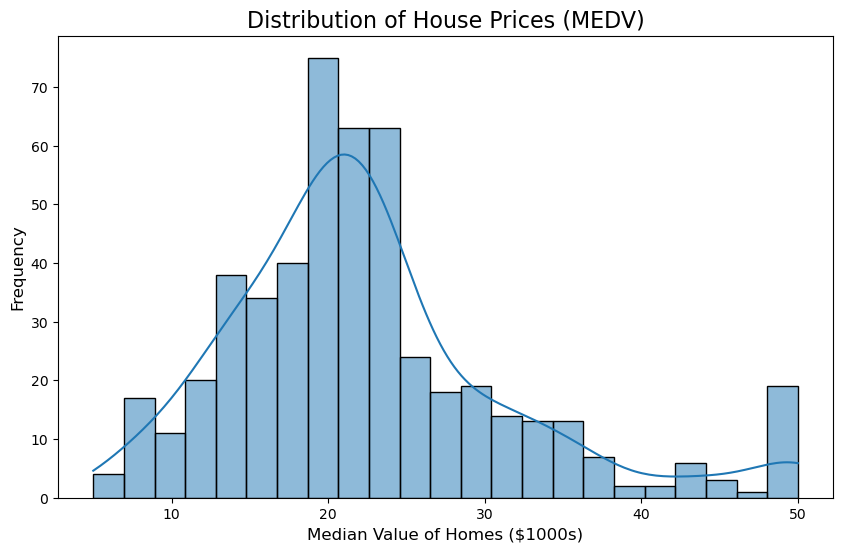

In [18]:
# Distribution of target variable (assuming MEDV is the target)
plt.figure(figsize=(10, 6))
sns.histplot(df['MEDV'], kde=True)
plt.title('Distribution of House Prices (MEDV)', fontsize=16)
plt.xlabel('Median Value of Homes ($1000s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

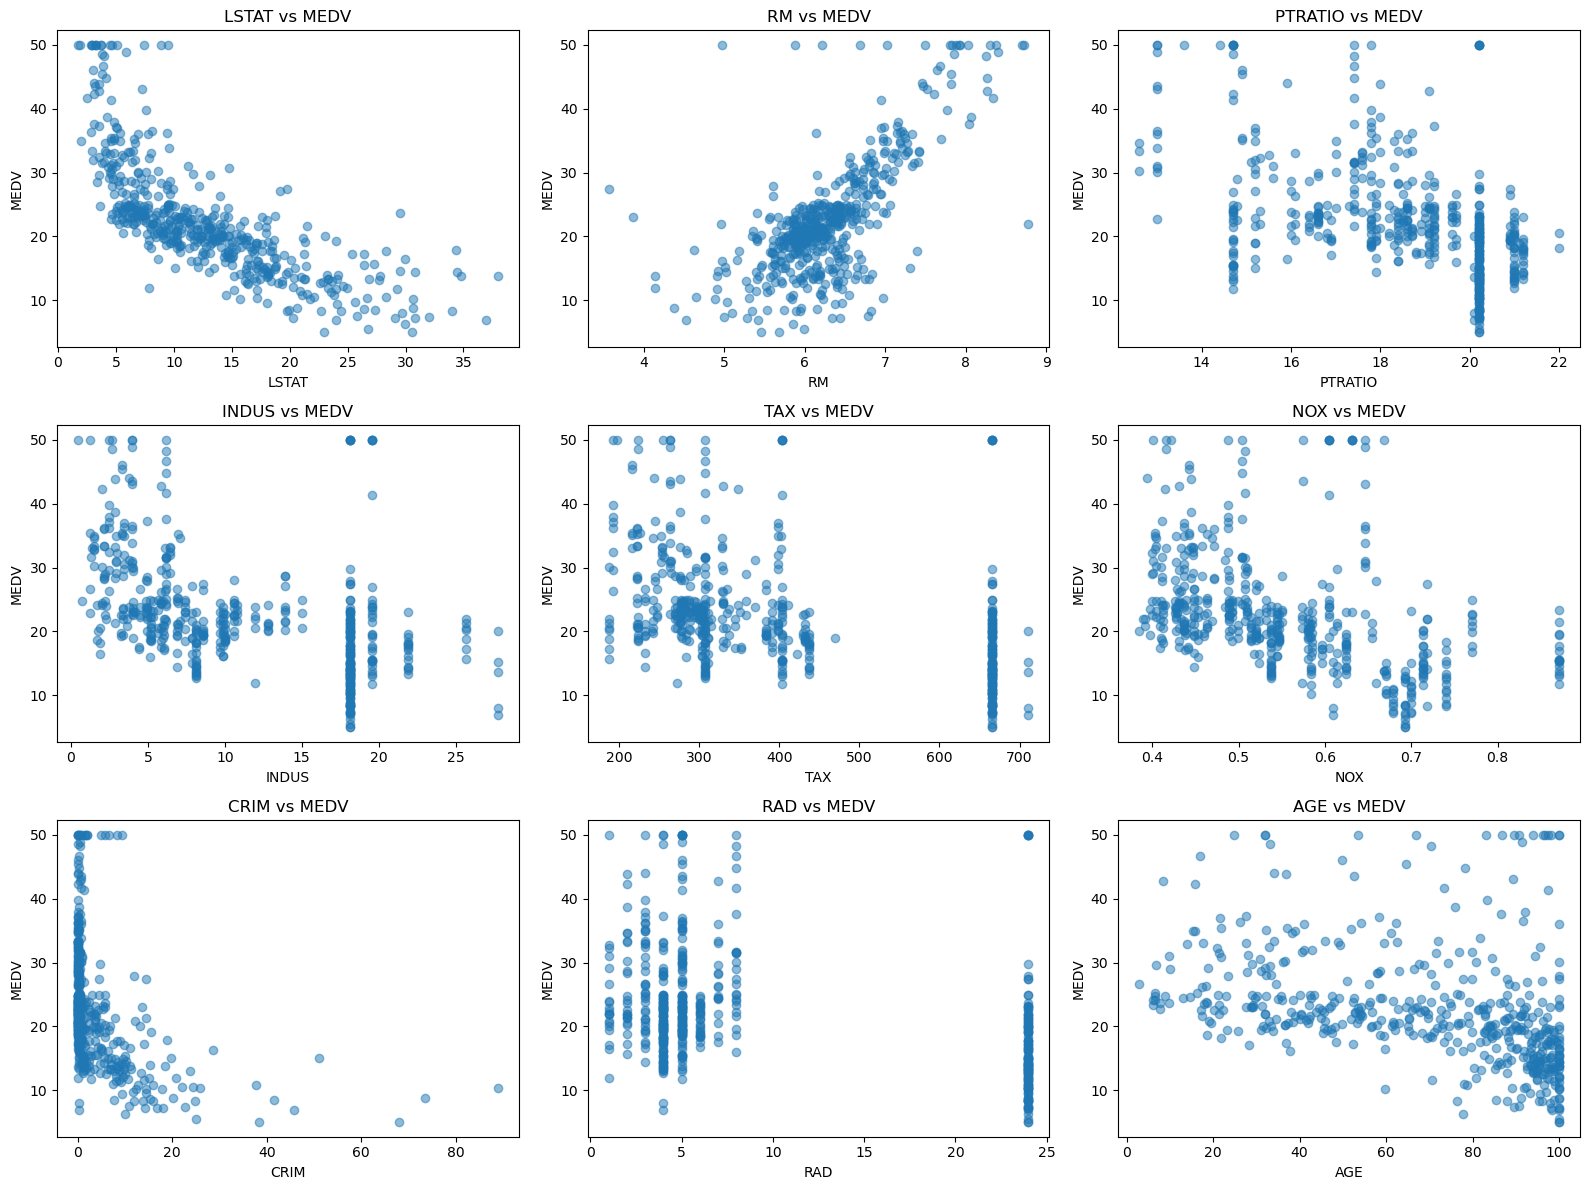

In [20]:
# Scatter plots of important features vs target
plt.figure(figsize=(16, 12))
features = df.columns[:-1]  # All columns except the last one (MEDV)
target = 'MEDV'

if len(features) > 9:
    # Select features with highest correlation to target
    correlations = abs(df.corr()[target]).sort_values(ascending=False)
    top_features = correlations[1:10].index  # Skip the target itself
else:
    top_features = features

# Create scatter plots
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
plt.tight_layout()
plt.show()

### Feature Engineering

In [21]:
# Check for any feature engineering needs based on the data
# For this example, we'll standardize the features
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [23]:
# Split the dataset into training and testing sets
print("\n--- Splitting Dataset ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


--- Splitting Dataset ---
Training set size: 404 samples
Testing set size: 102 samples


In [28]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training and Evaluation

In [29]:
# Function to evaluate and report model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print results
    print(f"\n{model_name} Model Performance:")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Testing MSE: {test_mse:.4f}")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Testing RMSE: {test_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Testing R²: {test_r2:.4f}")
    
    return {
        'model': model,
        'model_name': model_name,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'y_test': y_test,
        'y_pred': y_test_pred
    }

In [30]:
# List to store results for comparison
model_results = []

In [31]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_results = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression")
model_results.append(lr_results)


Linear Regression Model Performance:
Training MSE: 21.5268
Testing MSE: 24.4978
Training RMSE: 4.6397
Testing RMSE: 4.9495
Training R²: 0.7522
Testing R²: 0.6659


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [33]:

# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_results = evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree")
model_results.append(dt_results)


Decision Tree Model Performance:
Training MSE: 0.0000
Testing MSE: 23.1303
Training RMSE: 0.0000
Testing RMSE: 4.8094
Training R²: 1.0000
Testing R²: 0.6846


In [34]:
# 3. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_results = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")
model_results.append(rf_results)


Random Forest Model Performance:
Training MSE: 1.8928
Testing MSE: 8.3602
Training RMSE: 1.3758
Testing RMSE: 2.8914
Training R²: 0.9782
Testing R²: 0.8860


In [35]:
# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Model': [result['model_name'] for result in model_results],
    'Training MSE': [result['train_mse'] for result in model_results],
    'Testing MSE': [result['test_mse'] for result in model_results],
    'Training RMSE': [result['train_rmse'] for result in model_results],
    'Testing RMSE': [result['test_rmse'] for result in model_results],
    'Training R²': [result['train_r2'] for result in model_results],
    'Testing R²': [result['test_r2'] for result in model_results]
})

In [36]:
print(comparison_df)


               Model  Training MSE  Testing MSE  Training RMSE  Testing RMSE  \
0  Linear Regression     21.526755    24.497820       4.639693      4.949527   
1      Decision Tree      0.000000    23.130294       0.000000      4.809396   
2      Random Forest      1.892767     8.360242       1.375779      2.891408   

   Training R²  Testing R²  
0     0.752205    0.665941  
1     1.000000    0.684589  
2     0.978212    0.885997  


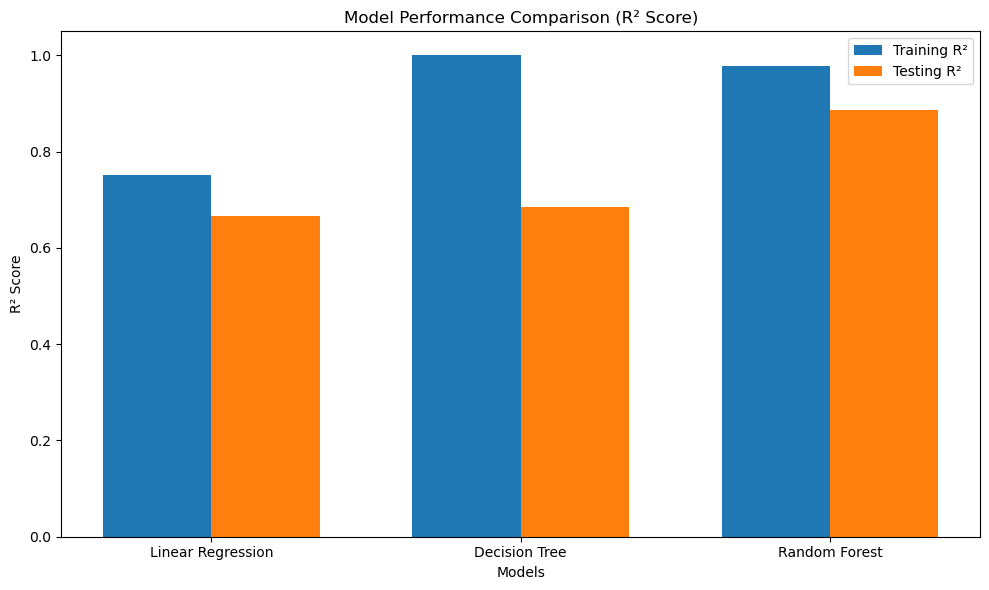

In [38]:
# Plot the comparison bar chart for R² scores
plt.figure(figsize=(10, 6))
models = comparison_df['Model']
x = np.arange(len(models))
width = 0.35
plt.bar(x - width/2, comparison_df['Training R²'], width, label='Training R²')
plt.bar(x + width/2, comparison_df['Testing R²'], width, label='Testing R²')

plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Performance Comparison (R² Score)')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

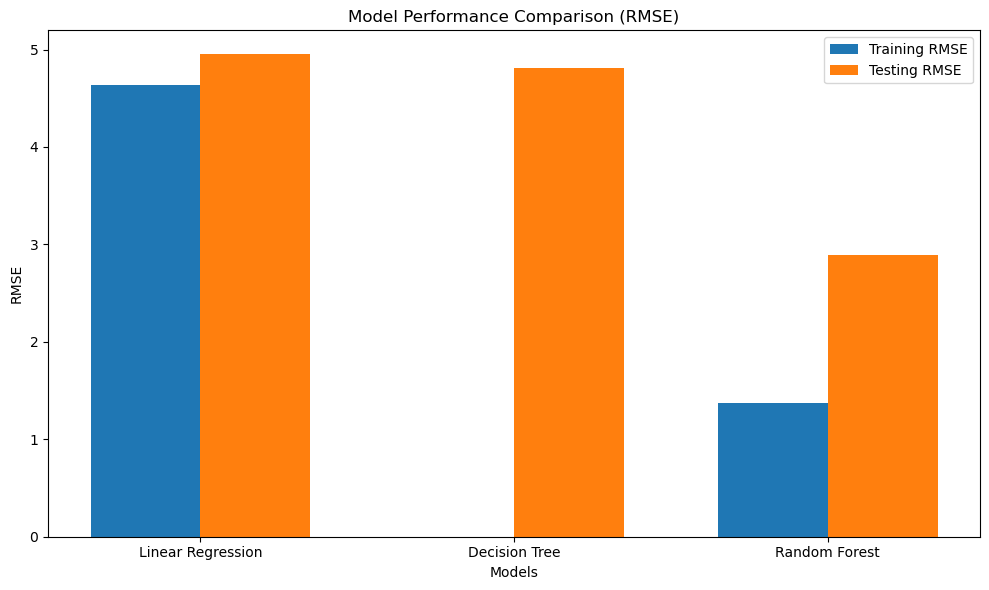

In [39]:
# Plot the comparison bar chart for RMSE
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, comparison_df['Training RMSE'], width, label='Training RMSE')
plt.bar(x + width/2, comparison_df['Testing RMSE'], width, label='Testing RMSE')

plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison (RMSE)')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

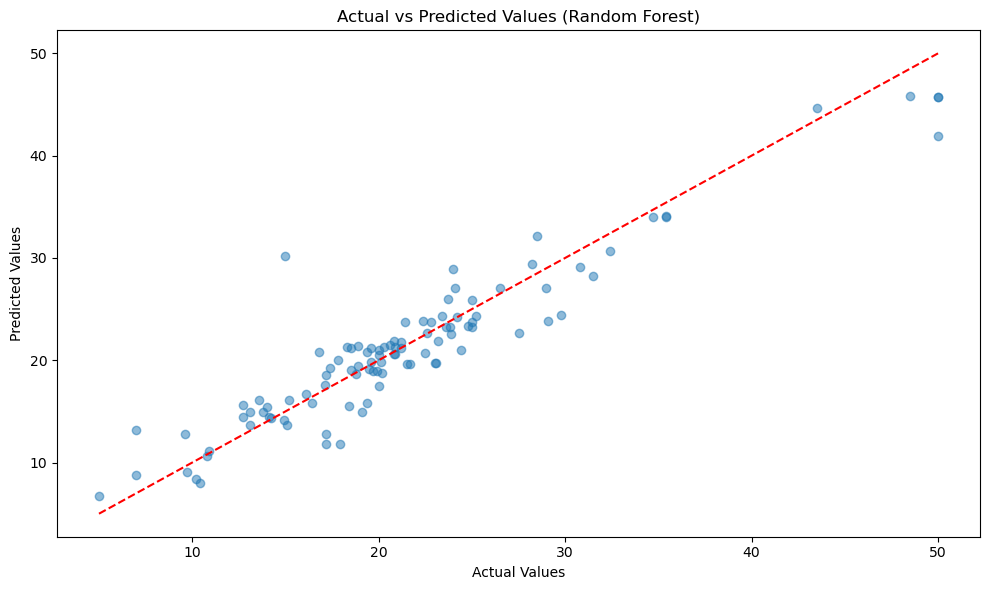

In [40]:
# Plot predicted vs actual values for the best model
# Find the best model based on test R²
best_model_idx = comparison_df['Testing R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_result = model_results[best_model_idx]

plt.figure(figsize=(10, 6))
plt.scatter(best_result['y_test'], best_result['y_pred'], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values ({best_model_name})')
plt.tight_layout()

In [41]:
# Feature Importance (for Random Forest)
if 'Random Forest' in [result['model_name'] for result in model_results]:
    rf_model = next(result['model'] for result in model_results if result['model_name'] == 'Random Forest')
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance (Random Forest)')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.close()
    
    print("\n--- Feature Importance (Random Forest) ---")
    print(feature_importance)


--- Feature Importance (Random Forest) ---
       Feature  Importance
6           RM    0.502631
13       LSTAT    0.307948
8          DIS    0.058325
1         CRIM    0.032738
0   Unnamed: 0    0.022757
5          NOX    0.014626
11     PTRATIO    0.013283
10         TAX    0.013034
7          AGE    0.012541
12           B    0.011123
3        INDUS    0.005024
9          RAD    0.002721
2           ZN    0.001646
4         CHAS    0.001602


In [42]:
# Conclusion
print("\n--- Conclusion ---")
print(f"The best performing model based on Testing R² score is: {best_model_name}")
print(f"Testing R² Score: {comparison_df.loc[best_model_idx, 'Testing R²']:.4f}")
print(f"Testing RMSE: {comparison_df.loc[best_model_idx, 'Testing RMSE']:.4f}")


--- Conclusion ---
The best performing model based on Testing R² score is: Random Forest
Testing R² Score: 0.8860
Testing RMSE: 2.8914


In [43]:

# Save the best model
import joblib
best_model = next(result['model'] for result in model_results if result['model_name'] == best_model_name)
joblib.dump(best_model, f'best_model_{best_model_name.replace(" ", "_").lower()}.pkl')
print(f"\nBest model saved as: best_model_{best_model_name.replace(' ', '_').lower()}.pkl")

print("\nTask completed successfully!")


Best model saved as: best_model_random_forest.pkl

Task completed successfully!
